# Checking Valid Preprocessed Dataset

This is to check for associated error codes for sites. These error codes means that there are missing fire history, vegetation cover, DEA FC, or SLGA data.

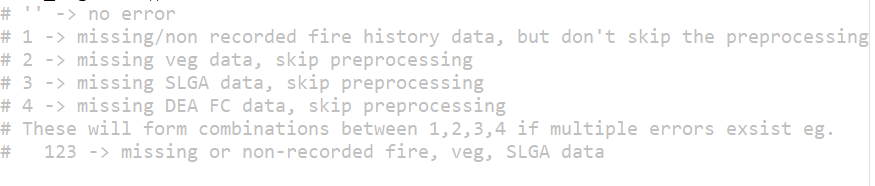

In [1]:
import pandas as pd

## Checking the associated errors that came with the first batch

In [2]:
log = pd.read_csv('../DATASETS/DEA_FC_PROCESSED/MODELLED_PREPROCESSED/Log/Site_Preprocessing_Log_1.csv', index_col = 0)

In [3]:
log = log.fillna(0)
log = log.sort_values('Error')
log = log.astype(int).astype(str)

In [4]:
error_counts = log.value_counts()

In [5]:
error_counts

Error
1        533
0        162
13         5
14         5
4          3
12         2
2          1
3          1
34         1
Name: count, dtype: int64

In [6]:
error_counts[1:].sum()

180

In [7]:
error_counts[:2].sum()

695

As above, 695 was originally the number of sites with 'complete datasets'

## With the new sets of AusPlot sites being made avaliable, Check how many 'complete' datasets were released

Since I am yet to collect DEA FC for the rest of the sites, I'll do an estimate by checking if the associated sites are recorded in SLGA and growth form cover

In [8]:
avaliable_veg = pd.read_csv('../DATASETS/AusPlots_Extracted_Data/Final/growth_forms_classification_by_dom_species_final_2-0-6.csv', index_col = 0)
avaliable_soil = pd.read_csv('../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/SGLA_PCA_3.csv', index_col = 0)
valid_sites = set(avaliable_veg['site_location_name']).intersection(avaliable_soil.index)

In [9]:
valid_sites = pd.DataFrame([list(valid_sites), [1 for i in range(len(valid_sites))]]).T
valid_sites = valid_sites.rename(columns = {0 : 'site_location_name', 1: 'is_complete'})

In [10]:
valid_sites.to_csv('../DATASETS/AusPlots_Extracted_Data/Final/completed_AusPlots_dataset_2-0-6.csv')

In [11]:
valid_sites

,site_location_name,is_complete
0,NTAGFU0018,1
1,WAANOK0008,1
2,WAACEK0003,1
3,QDACHC0006,1
4,QDASSD0006,1
...,...,...
733,NSAMDD0003,1
734,NTAPCK2014,1
735,QDAMGD0008,1
736,QDAGUP0008,1


As above, 738 sites are now avaliable (however, some of the sites were improperly georeferenced so DEA FC returned nothing from them)

## Checking how many separate sites are being included

Using the error log, I will separate out sites that were reported codes:

--> '0' no error

--> '1' no fire records

--> '4' missing DEA FC (most likely due to improper georeferencing)

--> '14' missing DEA + no fire records

In [12]:
new_sites = set(valid_sites['site_location_name']).difference(log.loc[(log['Error'] == '0') | (log['Error'] == '1') | (log['Error'] == '4') |  (log['Error'] == '14'),:].index)
print(list(new_sites))
print(len(new_sites))

['NSABHC0025', 'SAARIV0006', 'WAAPIL0013', 'NTASSD0005', 'SAARIV0008', 'NTAPCK2013', 'SAARIV0007', 'NSABHC0015', 'NTASSD0001', 'NTASSD0009', 'NTAPCK1010', 'SAARIV0004', 'WAAPIL0017', 'NTAPCK1011', 'WAAPIL0006', 'NTAPCK1012', 'NTASSD0010', 'VCAAUA0004', 'NTASSD0004', 'VCAAUA0006', 'SAARIV0002', 'SAARIV0005', 'NTASSD0003', 'NSABHC0017', 'SAARIV0003', 'NTAPCK1009', 'NTASSD0007', 'NTASSD0006', 'SAAGAW0004', 'SAARIV0001', 'NTAPCK0003', 'SAAFLB0006', 'NTAPCK2014', 'SAARIV0009', 'WAGCOO0002']
35


From above:
- 35 New sites will be added
- 8 sites will be corrected

In [13]:
site_info_all = pd.read_csv('../DATASETS/AusPlots_Extracted_Data/Final/extracted_Final_site_info_2-0-6.csv', index_col = 0)

In [14]:
new_sites_df = site_info_all.loc[site_info_all['site.info.site_location_name'].isin(new_sites), ['site.info.site_location_name','site.info.latitude', 'site.info.longitude']]
new_sites_df = new_sites_df.drop_duplicates()

In [15]:
new_sites_df = new_sites_df.rename(columns = {new_sites_df.columns[0]:'site_location_name', new_sites_df.columns[1]:'latitude', new_sites_df.columns[2]:'longtitude'})
new_sites_df

,site_location_name,latitude,longtitude
23,NSABHC0015,-31.833940,141.059250
25,NSABHC0017,-31.843310,141.192629
33,NSABHC0025,-32.420531,141.535447
231,NTAPCK0003,-12.625497,132.853924
241,NTAPCK1009,-12.671938,132.942318
242,NTAPCK1010,-12.676906,132.964769
243,NTAPCK1011,-12.701198,132.929794
244,NTAPCK1012,-12.702209,132.932917
245,NTAPCK2013,-12.706168,132.927351
246,NTAPCK2014,-12.699107,132.930501


In [16]:
new_sites_df = new_sites_df.reset_index(drop = True)

In [17]:
new_sites_df

,site_location_name,latitude,longtitude
0,NSABHC0015,-31.833940,141.059250
1,NSABHC0017,-31.843310,141.192629
2,NSABHC0025,-32.420531,141.535447
3,NTAPCK0003,-12.625497,132.853924
4,NTAPCK1009,-12.671938,132.942318
5,NTAPCK1010,-12.676906,132.964769
6,NTAPCK1011,-12.701198,132.929794
7,NTAPCK1012,-12.702209,132.932917
8,NTAPCK2013,-12.706168,132.927351
9,NTAPCK2014,-12.699107,132.930501


In [18]:
new_sites_df.to_csv('../DATASETS/AusPlots_Extracted_Data/Final/New_AusPlots_Locations_SW_Points.csv')